## **<center>Predicting The Success of Crowdfunding Projects on Kickstarter** </center>


Authors: Cam Nguyen and Marium Waseem

 GitHub Repository: https://github.com/camgitblame/INM701_IntroAI.git
 
 Dataset Source: https://www.kaggle.com/code/milicaradisavljevic/kickstarter-projects-nn/input?select=ks-projects-201801.csv


## Import Libraries


In [399]:
#Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
import os

## Load Dataset


In [400]:
# Loading Kaggale Dataset
data = pd.read_csv("./ks-projects-201801.csv", encoding="latin1")
data.head(2)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00


## EDA


Data Inspection 

In [401]:
data.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

In [402]:
data.shape

(378661, 15)

In [403]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [404]:
df = data.drop(columns=["ID", "pledged", "usd pledged", "usd_pledged_real", "backers"])

In [405]:
df.head(2)

,name,category,main_category,currency,deadline,goal,launched,state,country,usd_goal_real
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,failed,GB,1533.95
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,failed,US,30000.00


#### Drop irrelevant columns


In [406]:
df[["goal", "usd_goal_real"]].head()

,goal,usd_goal_real
0,1000.0,1533.95
1,30000.0,30000.00
2,45000.0,45000.00
3,5000.0,5000.00
4,19500.0,19500.00


In [407]:
df = df.drop(columns=["goal"])

In [408]:
df.head(2)

,name,category,main_category,currency,deadline,launched,state,country,usd_goal_real
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,failed,GB,1533.95
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,failed,US,30000.00


In [409]:
df["country"].value_counts()

country
US      292627
GB       33672
CA       14756
AU        7839
DE        4171
N,0"      3797
FR        2939
IT        2878
NL        2868
ES        2276
SE        1757
MX        1752
NZ        1447
DK        1113
IE         811
CH         761
NO         708
HK         618
BE         617
AT         597
SG         555
LU          62
JP          40
Name: count, dtype: int64

In [410]:
df["country"].describe()

count     378661
unique        23
top           US
freq      292627
Name: country, dtype: object

In [411]:
# Counting the occurrences of each currency type in the dataframe
df["currency"].value_counts() 

currency
USD    295365
GBP     34132
EUR     17405
CAD     14962
AUD      7950
SEK      1788
MXN      1752
NZD      1475
DKK      1129
CHF       768
NOK       722
HKD       618
SGD       555
JPY        40
Name: count, dtype: int64

In [412]:
df["currency"].describe()

count     378661
unique        14
top          USD
freq      295365
Name: currency, dtype: object

In [413]:
df = df.drop(columns=["currency"])

In [414]:
df.head(2)

,name,category,main_category,deadline,launched,state,country,usd_goal_real
0,The Songs of Adelaide & Abullah,Poetry,Publishing,2015-10-09,2015-08-11 12:12:28,failed,GB,1533.95
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,2017-11-01,2017-09-02 04:43:57,failed,US,30000.00


#### Handle missing values


In [415]:
df.shape

(378661, 8)

In [416]:
# Checking for missing values and removing any rows containing them
df.isnull().sum()

name             4
category         0
main_category    0
deadline         0
launched         0
state            0
country          0
usd_goal_real    0
dtype: int64

In [417]:
df = df.dropna()

In [418]:
df.isnull().sum()

name             0
category         0
main_category    0
deadline         0
launched         0
state            0
country          0
usd_goal_real    0
dtype: int64

In [419]:
df.shape

(378657, 8)

#### Distribution of Projects By States


In [420]:
# Calculating the counts of each unique state and setting up a new dataframe with these counts

state_counts_og = df["state"].value_counts().reset_index()
state_counts_og.columns = ["state", "count"]
state_counts_og

,state,count
0,failed,197716
1,successful,133956
2,canceled,38779
3,undefined,3562
4,live,2799
5,suspended,1845


In [421]:
# Assigning colors for visualization: red for 'failed' and blue for 'successful' 

two_colors = {"failed": "#cf453c", "successful": "#6788ee"}

In [422]:
# Setting up a color palette for different project states to enhance visual differentiation

mul_colors = {
    "failed": "#cf453c",
    "successful": "#6788ee",
    "canceled": "#f7a889",
    "live": "#3b4cc0",
    "undefined": "#cdd9ec",
    "suspended": "#e46e56",
}

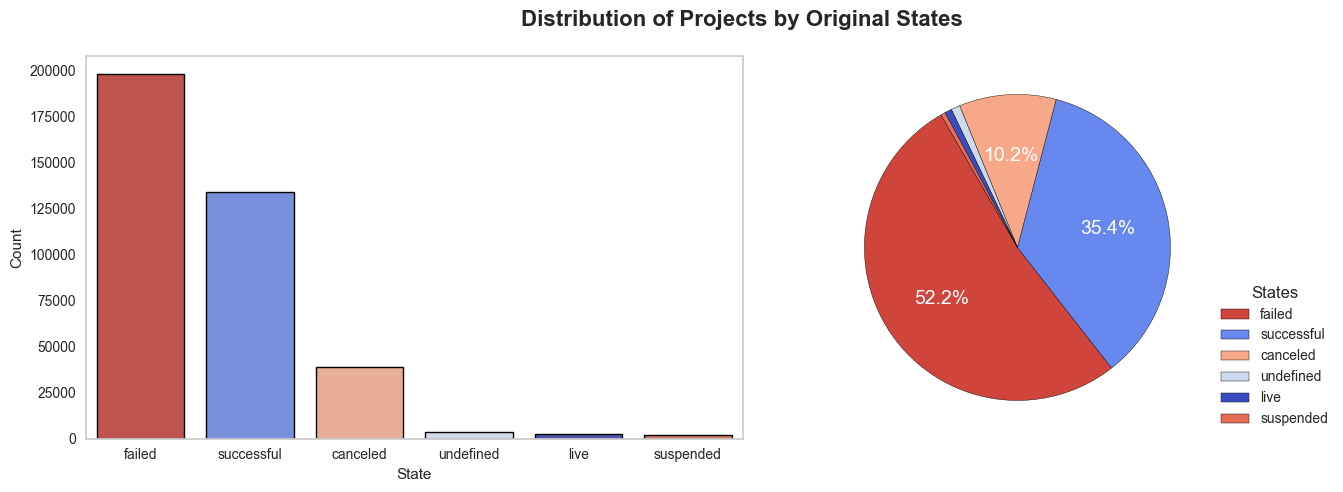

In [423]:
# Creating a side-by-side bar and pie chart to visualize the distribution of project states
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(x='state', y='count', data=state_counts_og, palette=mul_colors, ax=axes[0], edgecolor='black', linewidth=1)
axes[0].set_xlabel('State')
axes[0].set_ylabel('Count')
axes[0].grid(False)

axes[1].pie(
    state_counts_og['count'],
    labels=state_counts_og['state'],
    colors=[mul_colors[state] for state in state_counts_og['state']],
    autopct=lambda pct: '%1.1f%%' % pct if pct >= 10 else '',
    startangle=120,
    wedgeprops={'edgecolor': 'black'},
    textprops={'fontsize': 14, 'color': 'white'},
)


axes[1].legend(
    state_counts_og['state'],
    loc='lower left',
    bbox_to_anchor=(1, 0),
    title="States",
    fontsize=10
)

fig.suptitle('Distribution of Projects by Original States', fontsize=16, fontweight='bold', ha='center')

plt.tight_layout(rect=[0, 0, 0.95, 1]) 
plt.show()


##### Only keep `failed` and `successful` projects


In [424]:
# Filters the dataframe to only include rows where the 'state' is 'failed' or 'successful', then displays the first two rows

df = df.loc[df["state"].isin(["failed", "successful"])]
df.head(2)

,name,category,main_category,deadline,launched,state,country,usd_goal_real
0,The Songs of Adelaide & Abullah,Poetry,Publishing,2015-10-09,2015-08-11 12:12:28,failed,GB,1533.95
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,2017-11-01,2017-09-02 04:43:57,failed,US,30000.00


In [425]:
# Counts occurrences of each state and resets the index to create a new dataframe with 'state' and 'count' columns

stateCtNew = df["state"].value_counts().reset_index()
stateCtNew.columns = ["state", "count"]
stateCtNew

,state,count
0,failed,197716
1,successful,133956


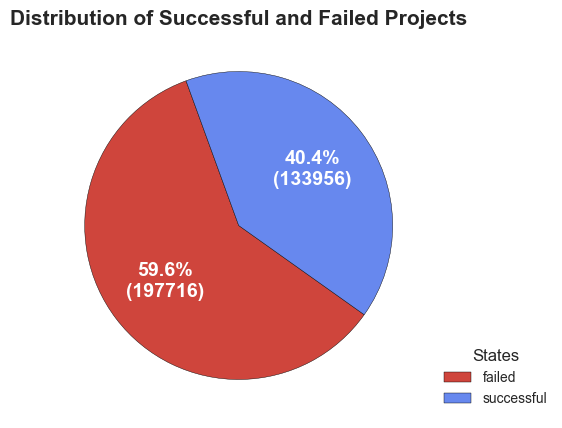

In [426]:
# shows a pie chart showing the distribution of successful and failed projects
fig, ax = plt.subplots(figsize=(5, 5))

def autopct_format(values):
    def custom_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{pct:.1f}%\n({val:d})'
    return custom_format

wedges, texts, autotexts = ax.pie(
    stateCtNew['count'],
    labels=stateCtNew['state'],
    colors=[two_colors[state] for state in stateCtNew['state']],
    autopct=autopct_format(stateCtNew['count']),
    startangle=110,
    wedgeprops={'edgecolor': 'black'},
    textprops={'fontsize': 14, 'color': 'white'}
)

plt.setp(autotexts, size=14, weight='bold', color='white') 
plt.setp(texts, fontsize=14, color='white')  

ax.set_title('Distribution of Successful and Failed Projects', fontsize=15, fontweight='bold')

ax.legend(
    stateCtNew['state'],
    loc='lower left',
    bbox_to_anchor=(1, 0),
    title="States",
    fontsize=10
)

plt.show()


#### Distribution of Projects by Main Categories


In [427]:
df["main_category"].describe()

count           331672
unique              15
top       Film & Video
freq             56526
Name: main_category, dtype: object

In [428]:
# Counts occurrences of each main category, resets index, and sorts the counts in descending order
mainCatCount = df["main_category"].value_counts().reset_index()
mainCatCount.columns = ["main_category", "count"]
mainCatCount = mainCatCount.sort_values("count", ascending=False)

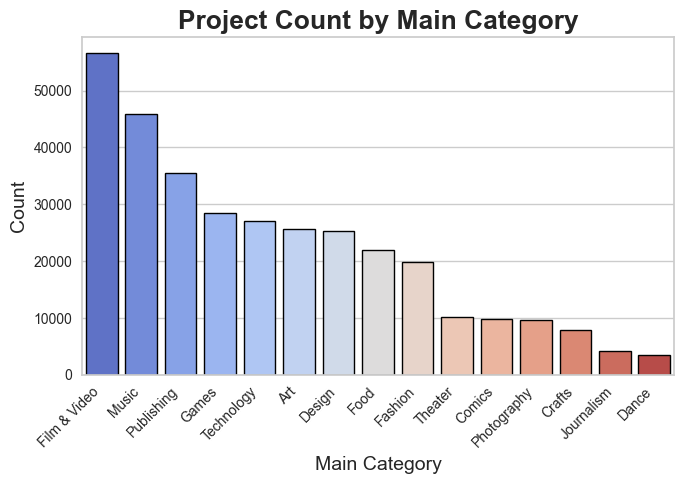

In [429]:
# Plots a countplot for project counts by main category
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x="main_category", order = mainCatCount['main_category'], palette="coolwarm", edgecolor="black", linewidth=1)
plt.title("Project Count by Main Category", fontsize=19, fontweight='bold')
plt.xlabel("Main Category", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

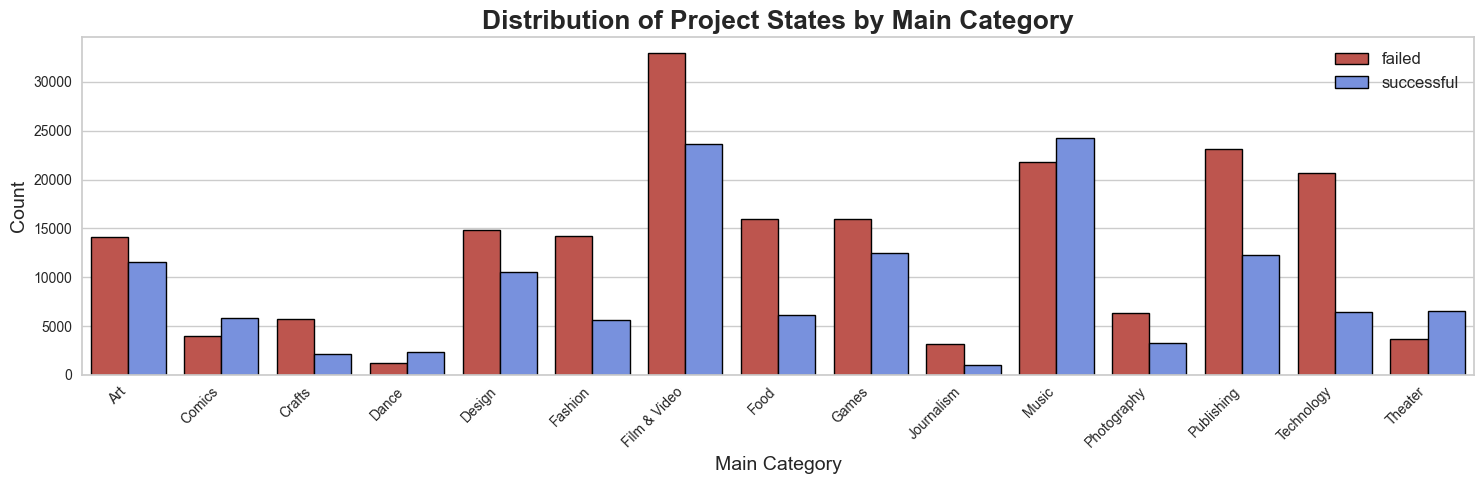

In [430]:
# Groups data by main category and state, then plots a bar chart to show the distribution of project states across categories

catStageCt = df.groupby(["main_category", "state"]).size().reset_index()
catStageCt.columns = ["main_category", "state", "count"]

plt.figure(figsize=(15, 5))
sns.barplot(data=catStageCt, x="main_category", y="count", hue="state", palette=two_colors, edgecolor="black", linewidth=1)

plt.title("Distribution of Project States by Main Category", fontsize=19, fontweight='bold')
plt.xlabel("Main Category", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='', fontsize=12)
plt.tight_layout()

plt.show()


#### Distribution of Projects by Categories


In [431]:
df["category"].describe()

count             331672
unique               159
top       Product Design
freq               18680
Name: category, dtype: object

In [432]:
# Filters successful and failed projects, identifies top 10 categories in each, and creates dataframes for count visualization

successfulProject = df.loc[df["state"] == "successful"]
successfulCat = successfulProject["category"].value_counts().head(10).index
successfulCat_df = successfulProject.loc[
    successfulProject["category"].isin(successfulCat)
]
successfulCatCt = successfulCat_df["category"].value_counts().reset_index()
successfulCatCt.columns = ["category", "count"]
failedProject = df.loc[df["state"] == "failed"]
failedCat = failedProject["category"].value_counts().head(10).index
failedCat_df = failedProject.loc[failedProject["category"].isin(failedCat)]
failedCatCt = failedCat_df["category"].value_counts().reset_index()
failedCatCt.columns = ["category", "count"]

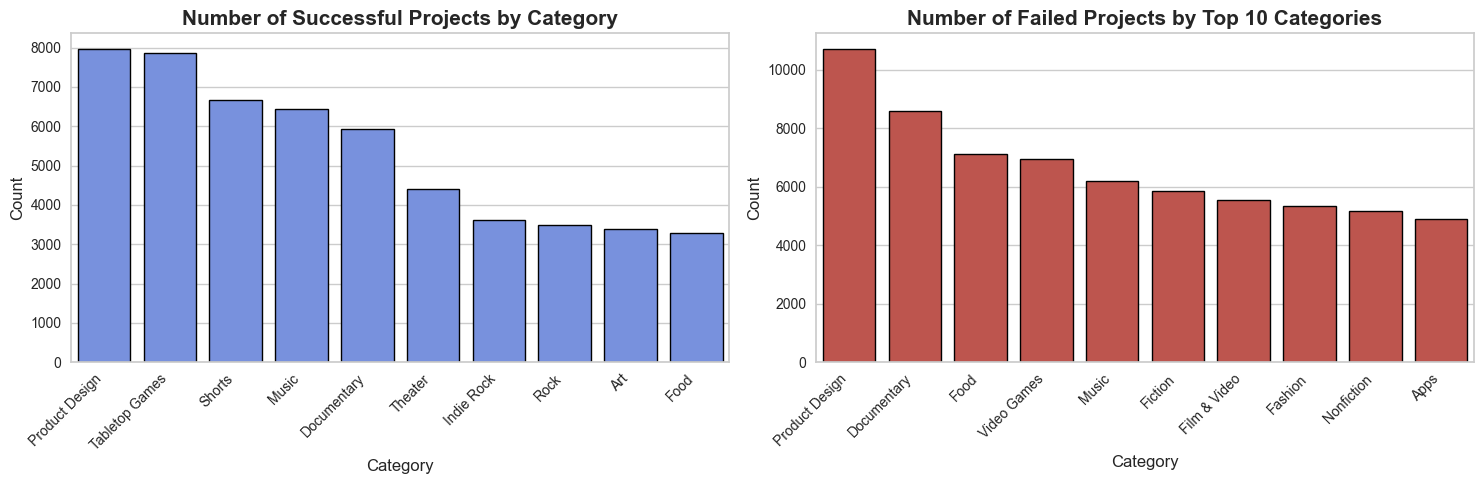

In [433]:
# Plots bar charts side-by-side for the top 10 categories
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=successfulCatCt, x="category", y="count", palette=["#6788ee"], edgecolor='black', linewidth=1)
plt.title("Number of Successful Projects by Category", fontsize=15, fontweight='bold')
plt.xlabel("Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
sns.barplot(data=failedCatCt, x="category", y="count", palette=["#cf453c"], edgecolor='black', linewidth=1)
plt.title("Number of Failed Projects by Top 10 Categories", fontsize=15, fontweight='bold')
plt.xlabel("Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


#### Distribution of Projects by Goal


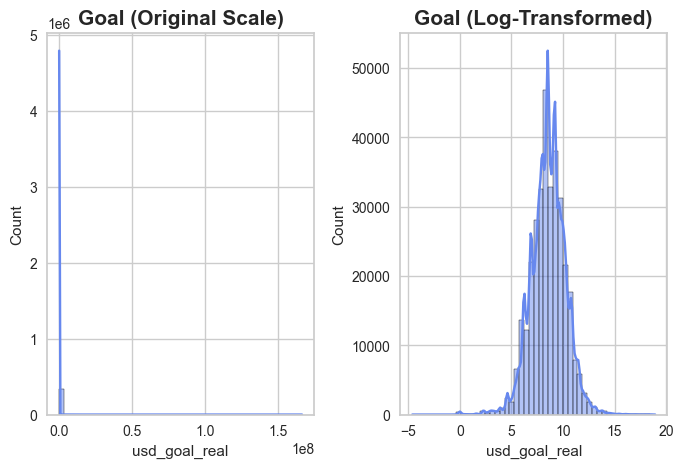

In [434]:
# usd_goal_real distribution before and after log transformation
plt.figure(figsize=(7, 5))
plt.subplot(1, 2, 1)
sns.histplot(df["usd_goal_real"], bins=50, kde=True, color = "#6788ee")
plt.title("Goal (Original Scale)", fontsize=15, fontweight='bold')
plt.subplot(1, 2, 2)
sns.histplot(np.log(df["usd_goal_real"]), bins=50, kde=True, color = "#6788ee")
plt.title("Goal (Log-Transformed)", fontsize=15, fontweight='bold')
plt.tight_layout()

plt.show()

In [435]:
df["logGoal"] = np.log1p(df["usd_goal_real"])

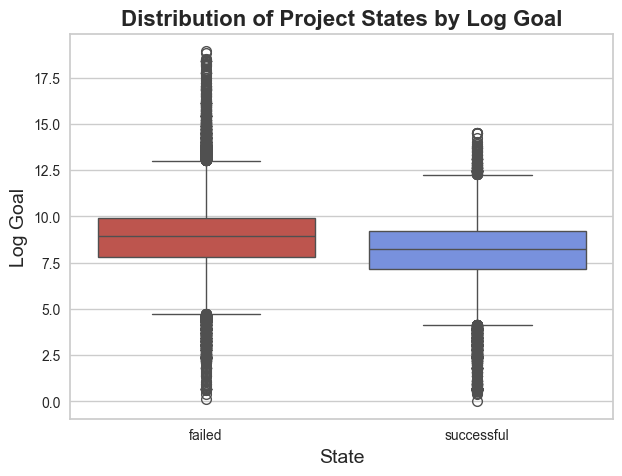

In [436]:
# Displays boxplots to compare the log-transformed goal amounts between different project states

plt.figure(figsize=(7, 5))
sns.boxplot(x="state", y="logGoal", data=df, palette=two_colors)
plt.title("Distribution of Project States by Log Goal", fontsize=16, fontweight='bold')
plt.xlabel("State", fontsize=14)
plt.ylabel("Log Goal", fontsize=14)
plt.show()


In [437]:
df.drop(columns=["usd_goal_real"], inplace=True)

In [438]:
df.head(2)

,name,category,main_category,deadline,launched,state,country,logGoal
0,The Songs of Adelaide & Abullah,Poetry,Publishing,2015-10-09,2015-08-11 12:12:28,failed,GB,7.336253
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,2017-11-01,2017-09-02 04:43:57,failed,US,10.308986


#### Distribution of Projects by Time


Convert `launched` and `deadline` to date time format


In [439]:
df["launched"] = pd.to_datetime(df["launched"])
df["deadline"] = pd.to_datetime(df["deadline"])

Create `length` to calculate project lengths in days


In [440]:
df["length"] = (df["deadline"] - df["launched"]).dt.days + 1

In [441]:
df.head(2)

,name,category,main_category,deadline,launched,state,country,logGoal,length
0,The Songs of Adelaide & Abullah,Poetry,Publishing,2015-10-09,2015-08-11 12:12:28,failed,GB,7.336253,59
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,2017-11-01,2017-09-02 04:43:57,failed,US,10.308986,60


In [442]:
lengthFailed = df[df["state"] == "failed"]["length"]
lengthFailed.describe()

count    197716.000000
mean         35.173350
std          13.175031
min           1.000000
25%          30.000000
50%          30.000000
75%          40.000000
max          92.000000
Name: length, dtype: float64

In [443]:
# Calculates the mean campaign length for failed and successful projects
meanLengthFailed = df[df["state"] == "failed"]["length"].mean()
meanLengthSuccessful = df[df["state"] == "successful"]["length"].mean()
print(meanLengthFailed)
print(meanLengthSuccessful)

35.17334965303769
32.15646928842306


In [444]:
meanLength = df.groupby("state")["length"].mean().reset_index()
meanLength.columns = ["state", "meanLength"]

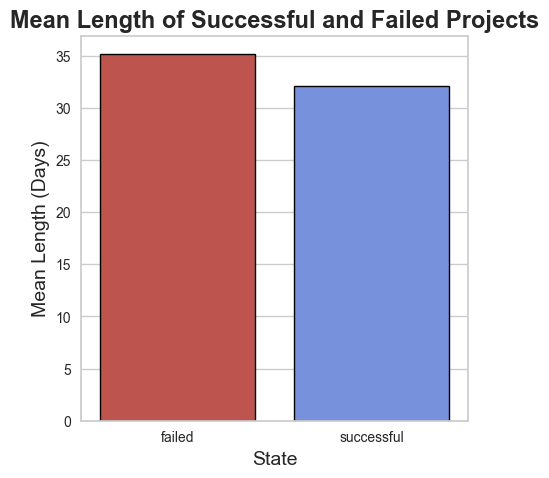

In [445]:
# Displays the average campaign lengths for successful and failed projects
plt.figure(figsize=(5, 5))
sns.barplot(data=meanLength, x="state", y="meanLength", palette=two_colors, edgecolor="black", linewidth=1)
plt.title("Mean Length of Successful and Failed Projects", fontsize=17, fontweight='bold')
plt.xlabel("State", fontsize=14)
plt.ylabel("Mean Length (Days)", fontsize=14)
plt.show()


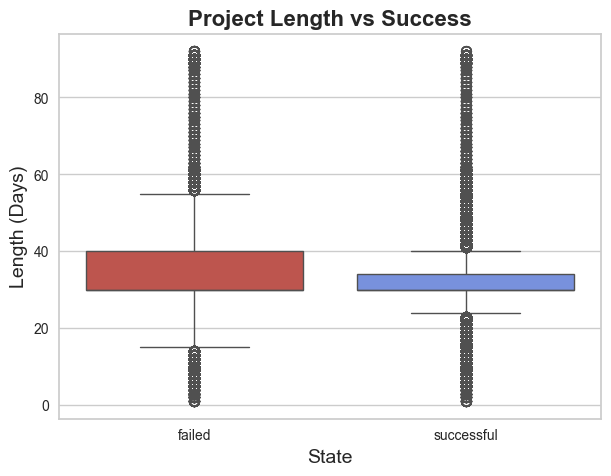

In [446]:
# Project length vs success
plt.figure(figsize=(7, 5))
sns.boxplot(x="state", y="length", data=df, palette=two_colors)

plt.title("Project Length vs Success", fontsize=16, fontweight='bold')
plt.xlabel("State", fontsize=14)
plt.ylabel("Length (Days)", fontsize=14)
plt.show()

- Create features `launch_year` and `launch_month`


In [447]:
df["launch_year"] = pd.to_datetime(df["launched"], format="mixed").dt.year
df["launch_month"] = pd.to_datetime(df["launched"], format="mixed").dt.month

In [448]:
# Converts project state to a numeric format and calculates average success rates by launch month and year

df["state_numeric"] = df["state"].apply(lambda x: 1 if x == "successful" else 0)
launch_month_success_rate = df.groupby("launch_month")["state_numeric"].mean()
df["launch_year"] = df["launch_year"].astype(str)
launch_year_success_rate = df.groupby("launch_year")["state_numeric"].mean()

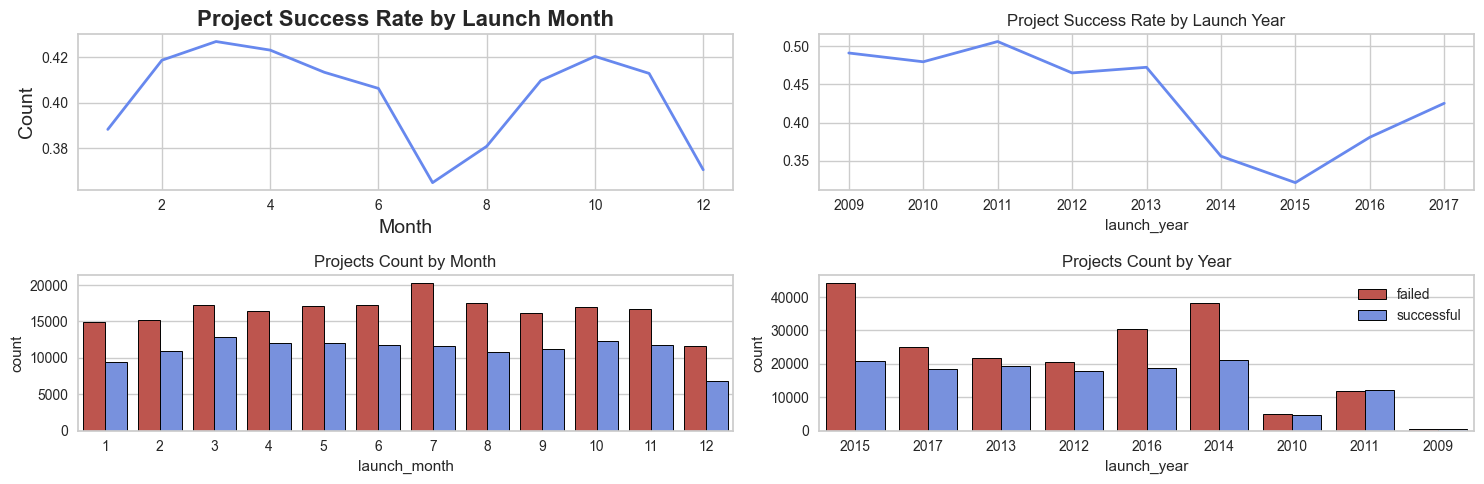

In [449]:
fig, axes = plt.subplots(2, 2, figsize=(15, 5))

# Project Success Rate by Launch Month
sns.lineplot(x=launch_month_success_rate.index, y=launch_month_success_rate.values, ax=axes[0, 0], color='#6788ee', linewidth=2)
axes[0, 0].set_title("Project Success Rate by Launch Month", fontweight="bold", fontsize=16)
axes[0, 0].set_xlabel("Month", fontsize=14)
axes[0, 0].set_ylabel("Count", fontsize=14)

# Project Success Rate by Launch Year
sns.lineplot(x=launch_year_success_rate.index, y=launch_year_success_rate.values, ax=axes[0, 1], color='#6788ee', linewidth=2)
axes[0, 1].set_title("Project Success Rate by Launch Year")

# Projects count by month
sns.countplot(x="launch_month", hue="state", data=df, ax=axes[1, 0], palette=two_colors, edgecolor="black", linewidth=0.7)
axes[1, 0].set_title("Projects Count by Month")
axes[1, 0].get_legend().remove()

# Projects count by year
sns.countplot(x="launch_year", hue="state", data=df, ax=axes[1, 1], palette=two_colors, edgecolor="black", linewidth=0.7)
axes[1, 1].set_title("Projects Count by Year")
axes[1, 1].get_legend().set_title("")

plt.tight_layout()
plt.show()


In [450]:
df.drop(columns=["state_numeric", "launched", "deadline"], inplace=True)

In [451]:
df.head(2)

,name,category,main_category,state,country,logGoal,length,launch_year,launch_month
0,The Songs of Adelaide & Abullah,Poetry,Publishing,failed,GB,7.336253,59,2015,8
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,failed,US,10.308986,60,2017,9


In [452]:
cw_colors = [
    "#e46e56",
    "#bbd1f8",
    "#f7af91",
    "#516ddb",
    "#f29274",
    "#f3c7b1",
    "#3b4cc0",
    "#86a9fc",
    "#a1c0ff",
    "#cf453c",
    "#6b8df0",
    "#b40426",
    "#d3dbe7",
    "#e6d7cf",
]

#### Distribution of Projects By Country


In [453]:
df["country"].describe()

count     331672
unique        23
top           US
freq      261358
Name: country, dtype: object

In [454]:
df["country"].unique()

array(['GB', 'US', 'CA', 'AU', 'NO', 'IT', 'DE', 'IE', 'MX', 'ES', 'SE',
       'FR', 'NZ', 'CH', 'AT', 'BE', 'DK', 'HK', 'NL', 'LU', 'SG', 'N,0"',
       'JP'], dtype=object)

In [455]:
# replace 'N,0"' values in "country" with 'NO' to avoid discrepancies
df = df.replace({'country': 'N,0"'}, {'country': 'N0'}, regex=True)

In [456]:
df["country"].unique()

array(['GB', 'US', 'CA', 'AU', 'NO', 'IT', 'DE', 'IE', 'MX', 'ES', 'SE',
       'FR', 'NZ', 'CH', 'AT', 'BE', 'DK', 'HK', 'NL', 'LU', 'SG', 'N0',
       'JP'], dtype=object)

In [457]:
countryCt = df["country"].value_counts().reset_index()
countryCt.columns = ["country", "count"]

In [458]:
# Calculates the normalized success and failure rates for projects by country, sorts by success rate, and handles missing values

countrySuccessRate = df.groupby("country")["state"].value_counts(normalize=True).unstack()
countrySuccessRate = countrySuccessRate.sort_values(by="successful", ascending=False)
countrySuccessRate = countrySuccessRate.fillna(0).reset_index()
countrySuccessRate.columns = ["country", "failed", "successful"]
countrySuccessRate["success_rate"] = countrySuccessRate["successful"] / (
        countrySuccessRate["failed"] + countrySuccessRate["successful"]
) * 100
countrySuccessRate = countrySuccessRate.sort_values(by="success_rate", ascending=False)

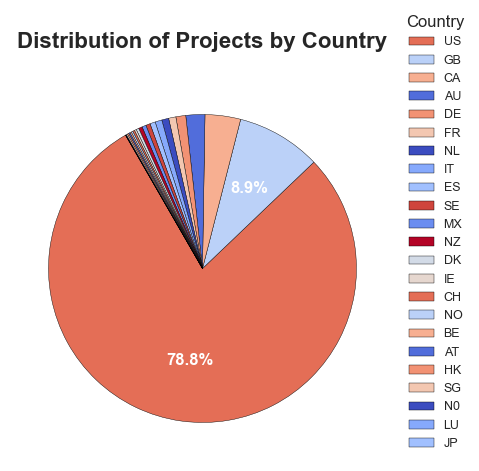

In [459]:
# Creates a pie chart to visualize the distribution of projects by country 
fig, ax = plt.subplots(figsize=(10, 5))

wedges, texts, autotexts = ax.pie(
    countryCt['count'],
    labels=countryCt['country'],
    colors=cw_colors[:len(countryCt)],
    autopct=lambda pct: '%1.1f%%' % pct if pct >= 8 else '',
    startangle=120,
    wedgeprops={'edgecolor': 'black'},
    textprops={'fontsize': 12, 'color': 'white'}
)

plt.setp(autotexts, size=12, weight='bold', color='white')
plt.setp(texts, fontsize=12, color='white')

plt.legend(
    countryCt['country'],
    loc='lower left',
    bbox_to_anchor=(1, 0),
    title="Country",
    fontsize=9
)
ax.set_title('Distribution of Projects by Country', fontsize=16, fontweight='bold', y=1.05)
plt.show()

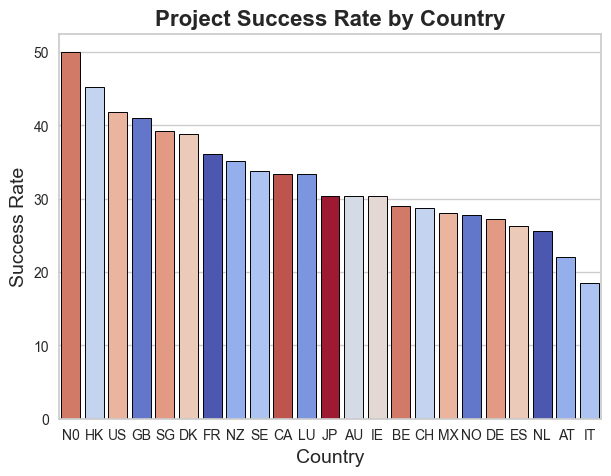

In [460]:
# Success rate by country 
plt.figure(figsize=(7, 5))
sns.barplot(x="country", y="success_rate", data=countrySuccessRate, palette=cw_colors, edgecolor="black", linewidth=0.7)
plt.title("Project Success Rate by Country", fontweight="bold", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Success Rate", fontsize=14)
# plt.xticks(rotation=90)
plt.show()

In [461]:
# create a feature to indicate projects based in the US
df['US_based'] = (df.country == 'US').astype(int)

In [462]:
df.head(2)

,name,category,main_category,state,country,logGoal,length,launch_year,launch_month,US_based
0,The Songs of Adelaide & Abullah,Poetry,Publishing,failed,GB,7.336253,59,2015,8,0
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,failed,US,10.308986,60,2017,9,1


#### Distribution of Projects Based on Name Features


In [463]:
# Create new features based on the name column
def name_features(df):
    # length
    df['n_length'] = df.name.str.len()

    # contain !
    df['exclaimation'] = (df.name.str[-1] == '!').astype(int)

    # contain ?
    df['question'] = (df.name.str[-1] == '?').astype(int)

    # word count
    df['words'] = df.name.apply(lambda x: len(str(x).split(' ')))

    # contain uppercase
    df['uppercase'] = df.name.str.isupper().astype(float)
    
    return df

In [464]:
df = name_features(df)

In [465]:
df.head(2)

,name,category,main_category,state,country,logGoal,length,launch_year,launch_month,US_based,n_length,exclaimation,question,words,uppercase
0,The Songs of Adelaide & Abullah,Poetry,Publishing,failed,GB,7.336253,59,2015,8,0,31,0,0,6,0.0
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,failed,US,10.308986,60,2017,9,1,45,0,0,8,0.0


In [466]:
df.drop(columns=["name", "country"], inplace=True)

In [467]:
df.head(2)

,category,main_category,state,logGoal,length,launch_year,launch_month,US_based,n_length,exclaimation,question,words,uppercase
0,Poetry,Publishing,failed,7.336253,59,2015,8,0,31,0,0,6,0.0
1,Narrative Film,Film & Video,failed,10.308986,60,2017,9,1,45,0,0,8,0.0


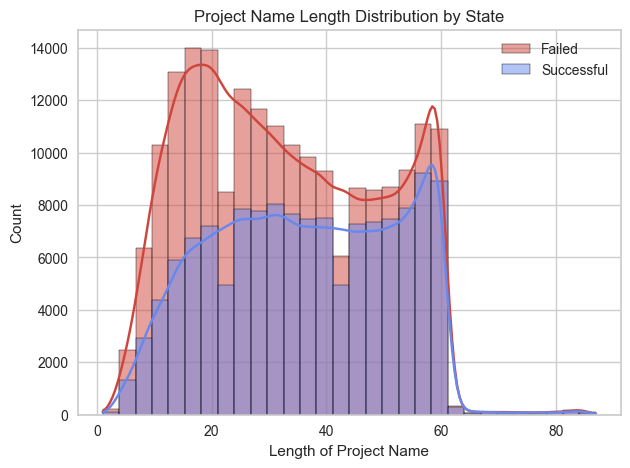

In [ ]:
# Project Name Length Vs State
plt.figure(figsize=(7, 5))
sns.histplot(df.loc[df.state == 'failed', 'n_length'], bins=30, color='#cf453c', kde=True, label='Failed')
sns.histplot(df.loc[df.state == 'successful', 'n_length'], bins=30, color='#6788ee', kde=True, label='Successful')

plt.title('Project Name Length Distribution by State')
plt.xlabel('Length of Project Name')
plt.ylabel('Count')
plt.legend()
plt.show()

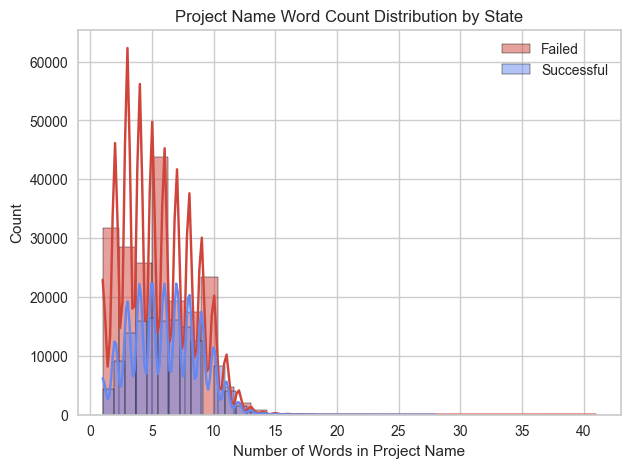

In [198]:
# Project name's word count vs State
plt.figure(figsize=(7, 5))
sns.histplot(df.loc[df.state == 'failed', 'words'], bins=30, color='#cf453c', kde=True, label='Failed')
sns.histplot(df.loc[df.state == 'successful', 'words'], bins=30, color='#6788ee', kde=True, label='Successful')

plt.title('Project Name Word Count Distribution by State')
plt.xlabel('Number of Words in Project Name')
plt.ylabel('Count')
plt.legend()
plt.show()

In [199]:
# Encode project states
df["state"] = df["state"].apply(lambda x: 1 if x == "successful" else 0)

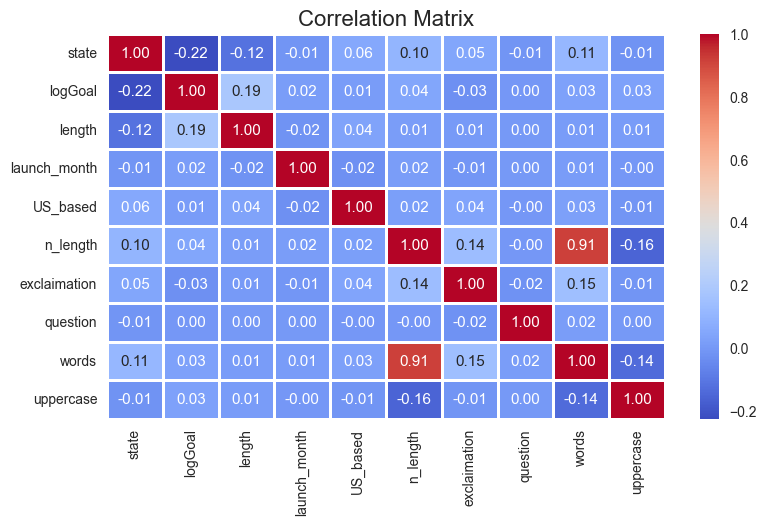

In [200]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(9, 5))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    linewidths=1,
    annot_kws={"size": 11},
    fmt=".2f",
)
plt.title("Correlation Matrix", fontsize=16, fontname="Arial")
plt.show()

In [201]:
df.columns

Index(['category', 'main_category', 'state', 'logGoal', 'length',
       'launch_year', 'launch_month', 'US_based', 'n_length', 'exclaimation',
       'question', 'words', 'uppercase'],
      dtype='object')

In [203]:
# Cleaning category columns by replacing special characters and spaces to prepare for encoding
def clean_category_columns(val):
    if isinstance(val, str):
        val = val.replace('&', 'and')
        val = val.replace('-', '_')
        val = val.strip()
        val = val.replace(' ', '_')
    return val
    
df['category'] = df['category'].apply(clean_category_columns)
df['main_category'] = df['main_category'].apply(clean_category_columns)

In [204]:
df.head(2)

,category,main_category,state,logGoal,length,launch_year,launch_month,US_based,n_length,exclaimation,question,words,uppercase
0,Poetry,Publishing,0,7.336253,59,2015,8,0,31,0,0,6,0.0
1,Narrative_Film,Film_and_Video,0,10.308986,60,2017,9,1,45,0,0,8,0.0


## Preprocessing + Feature Engineering


In [202]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

In [205]:
def preprocessing(df):
    # Bin 'launch_month' into quarters
    df["launch_quarter"] = pd.cut(
        df["launch_month"], bins=[0, 3, 6, 9, 12], labels=["Q1", "Q2", "Q3", "Q4"]
    )
    df = pd.get_dummies(df, columns=["launch_quarter"], drop_first=True)
    df.drop(columns=["launch_month"], axis=1, inplace=True)

    # Encode 'launch_year"
    le = LabelEncoder()
    df["launch_year"] = le.fit_transform(df["launch_year"])

    # Encode categorical variables
    categorical_columns = ["main_category", "category"]
    df_encoded = pd.get_dummies(df[categorical_columns], drop_first=True)
    df_encoded.dropna(inplace=True)

    # Apply PCA on main_category and category columns
    pca = PCA(n_components=5, random_state=1)  
    df_pca = pca.fit_transform(df_encoded)
    df_pca = pd.DataFrame(df_pca, columns=[f"pca_{i}" for i in range(1, 6)], index=df_encoded.index)
    
    # Add PCA-transformed data to the DataFrame
    df = pd.concat([df, df_pca], axis=1)
    df.drop(columns=categorical_columns, axis=1, inplace=True)

    # Use MinMax Scaler to scale features 'logGoal' and 'length' 
    scaler = MinMaxScaler(feature_range=(0, 1))
    df[["scaled_logGoal", "scaled_length"]] = scaler.fit_transform(
        df[["logGoal", "length"]]
    )
    df.drop(columns=["logGoal", "length"], axis=1, inplace=True)

    return df

In [206]:
df = preprocessing(df)
df.head(2)

,state,launch_year,US_based,n_length,exclaimation,question,words,uppercase,launch_quarter_Q2,launch_quarter_Q3,launch_quarter_Q4,pca_1,pca_2,pca_3,pca_4,pca_5,scaled_logGoal,scaled_length
0,0,6,0,31,0,0,6,0.0,False,True,False,-0.182377,-0.371370,-0.605122,-0.446335,-0.234480,0.387231,0.637363
1,0,8,1,45,0,0,8,0.0,False,True,False,0.837878,0.168734,0.001497,-0.038863,-0.053499,0.544354,0.648352


## Training


### Import ML Libraries


In [207]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    f1_score,
)
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [208]:
X = df.drop(columns=["state"], axis=1)
y = df[["state"]]

### Train Test Split


In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [210]:
print(f"Train size: {X_train.shape}")
print(f"Test size: {X_test.shape}")

Train size: (265337, 17)
Test size: (66335, 17)


In [211]:
X_train.head()

,launch_year,US_based,n_length,exclaimation,question,words,uppercase,launch_quarter_Q2,launch_quarter_Q3,launch_quarter_Q4,pca_1,pca_2,pca_3,pca_4,pca_5,scaled_logGoal,scaled_length
308402,7,1,23,0,0,4,0.0,False,False,False,-0.208435,-0.443244,1.085505,-0.529999,-0.297277,0.449660,0.318681
74084,7,0,58,0,0,9,0.0,False,False,True,-0.134533,-0.182342,-0.004042,0.160682,0.781080,0.572236,0.263736
8279,6,0,60,0,0,10,0.0,False,True,False,-0.133475,-0.180503,-0.003993,0.158575,0.768959,0.575115,0.318681
26402,6,1,33,0,0,4,0.0,False,False,False,-0.208435,-0.443244,1.085505,-0.529999,-0.297277,0.413034,0.538462
305815,2,1,37,0,0,7,0.0,True,False,False,1.016025,0.217481,0.002053,-0.054744,-0.081315,0.571353,0.318681


In [212]:
y_train.head()

,state
308402,0
74084,0
8279,0
26402,1
305815,0


### Baseline Model with Dummy Classifier


In [219]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    f1_score,
    roc_auc_score,
    precision_score,
    recall_score,
    ConfusionMatrixDisplay
)
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ClassificationReport, ConfusionMatrix


In [214]:
dummy = DummyClassifier(strategy="most_frequent", random_state=42)
dummy.fit(X_train, y_train)
accuracy = dummy.score(X_test, y_test)
y_pred = dummy.predict(X_test)

print("Baseline Model using Dummy Classifier Results:")
dummyAcc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {dummyAcc:.4f}")
dummyF1 = f1_score(y_test, y_pred, average="weighted")
print(f"\nF1 Score (weighted): {dummyF1:.4f}")
dummyPre = precision_score(y_test, y_pred, average="weighted")
print(f"\nPrecision Score (weighted): {dummyPre:.4f}")
dummyRec = recall_score(y_test, y_pred, average="weighted")
print(f"\nRecall Score (weighted): {dummyRec:.4f}")
dummyAUC = roc_auc_score(y_test, y_pred)
print(f"\nAUC ROC: {dummyAUC:.4f}")
dummyReport = classification_report(y_test, y_pred)
print("\nClassification Report:\n", dummyReport)
dummyCm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", dummyCm)

Baseline Model using Dummy Classifier Results:
Accuracy: 0.5966

F1 Score (weighted): 0.4459

Precision Score (weighted): 0.3559

Recall Score (weighted): 0.5966

AUC ROC: 0.5000

Classification Report:
               precision    recall  f1-score   support

           0       0.60      1.00      0.75     39576
           1       0.00      0.00      0.00     26759

    accuracy                           0.60     66335
   macro avg       0.30      0.50      0.37     66335
weighted avg       0.36      0.60      0.45     66335


Confusion Matrix:
 [[39576     0]
 [26759     0]]


In [215]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

### Training Pipeline


In [216]:
def training(model_name, model_pipeline, X, y, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )
    model_pipeline.fit(X_train, y_train)

    y_pred = model_pipeline.predict(X_test)
    y_proba = model_pipeline.predict_proba(X_test)[:, 1]

    clf_report = classification_report(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    conf_matrix = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    prec = precision_score(y_test, y_pred, average="weighted")
    rec = recall_score(y_test, y_pred, average="weighted")

    print(f"Accuracy (weighted) for {model_name}: {acc:.4f}")
    print(f"\nF1 (weighted) for {model_name}: {f1:.4f}")
    print(f"\nPrecision (weighted) for {model_name}: {prec:.4f}")
    print(f"\nRecall (weighted) for {model_name}: {rec:.4f}")
    print(f"\nROC AUC Score for {model_name}: {roc_auc:.4f}")
    print(f"\nClassification Report for {model_name}:\n", clf_report)
    print(f"\nConfusion Matrix for {model_name}:\n", conf_matrix)

    return {
        "model_name": model_name,
        "accuracy": acc,
        "f1": f1,
        "precision": prec,
        "recall": rec,
        "roc_auc": roc_auc,
        "clf_report": clf_report,
        "conf_matrix": conf_matrix,
    }

#### Gaussian Naive Bayes


In [217]:
gaussianClf = Pipeline(
    [
        ("Scaler", StandardScaler()),
        ("GaussianNB", GaussianNB()),
    ]
)

gaussianRes = training("Gaussian NB", gaussianClf, X, y)

Accuracy (weighted) for Gaussian NB: 0.6231

F1 (weighted) for Gaussian NB: 0.6226

Precision (weighted) for Gaussian NB: 0.6221

Recall (weighted) for Gaussian NB: 0.6231

ROC AUC Score for Gaussian NB: 0.6566

Classification Report for Gaussian NB:
               precision    recall  f1-score   support

           0       0.68      0.69      0.69     39544
           1       0.53      0.52      0.53     26791

    accuracy                           0.62     66335
   macro avg       0.61      0.61      0.61     66335
weighted avg       0.62      0.62      0.62     66335


Confusion Matrix for Gaussian NB:
 [[27287 12257]
 [12742 14049]]


In [221]:
berClf = Pipeline(
    [    ("Scaler", StandardScaler()),
        ("Bernoulli Naive Bayes", BernoulliNB())]
)

berRes = training("Bernoulli Naive Bayes", berClf, X, y)

Accuracy (weighted) for Bernoulli Naive Bayes: 0.6087

F1 (weighted) for Bernoulli Naive Bayes: 0.5979

Precision (weighted) for Bernoulli Naive Bayes: 0.5971

Recall (weighted) for Bernoulli Naive Bayes: 0.6087

ROC AUC Score for Bernoulli Naive Bayes: 0.6233

Classification Report for Bernoulli Naive Bayes:
               precision    recall  f1-score   support

           0       0.65      0.75      0.69     39544
           1       0.52      0.40      0.45     26791

    accuracy                           0.61     66335
   macro avg       0.58      0.58      0.57     66335
weighted avg       0.60      0.61      0.60     66335


Confusion Matrix for Bernoulli Naive Bayes:
 [[29542 10002]
 [15957 10834]]


#### Logistic Regression


In [223]:
logClf = Pipeline(
    [
        ("Scaler", StandardScaler()),
        ("Logistic Regression", LogisticRegression(penalty="l1", solver="saga")),
    ]
)

logRes = training("Logistic Regression", logClf, X, y)

Accuracy (weighted) for Logistic Regression: 0.6425

F1 (weighted) for Logistic Regression: 0.6253

Precision (weighted) for Logistic Regression: 0.6321

Recall (weighted) for Logistic Regression: 0.6425

ROC AUC Score for Logistic Regression: 0.6811

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.66      0.81      0.73     39544
           1       0.59      0.39      0.47     26791

    accuracy                           0.64     66335
   macro avg       0.62      0.60      0.60     66335
weighted avg       0.63      0.64      0.63     66335


Confusion Matrix for Logistic Regression:
 [[32089  7455]
 [16259 10532]]


#### KNN


In [225]:
knnClf = Pipeline(
    [
        ("Scaler", StandardScaler()),
        ("knn",
            KNeighborsClassifier(n_neighbors=4, p=2, metric="minkowski", n_jobs=-1),
        ),
    ]
)

knnRes = training("KNN", knnClf, X, y)

Accuracy (weighted) for KNN: 0.6283

F1 (weighted) for KNN: 0.6026

Precision (weighted) for KNN: 0.6151

Recall (weighted) for KNN: 0.6283

ROC AUC Score for KNN: 0.6416

Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.65      0.83      0.73     39544
           1       0.57      0.33      0.42     26791

    accuracy                           0.63     66335
   macro avg       0.61      0.58      0.57     66335
weighted avg       0.62      0.63      0.60     66335


Confusion Matrix for KNN:
 [[32768  6776]
 [17878  8913]]


#### Random Forest


In [226]:
rfClf = Pipeline(
    [
        ("Scaler", StandardScaler()),
        (
            "rf",
            RandomForestClassifier(n_estimators=100, max_depth=4, min_samples_leaf=3),
        ),
    ]
)

rfRes = training("Random Forest Classifier", rfClf, X, y)

Accuracy (weighted) for Random Forest Classifier: 0.6483

F1 (weighted) for Random Forest Classifier: 0.6093

Precision (weighted) for Random Forest Classifier: 0.6469

Recall (weighted) for Random Forest Classifier: 0.6483

ROC AUC Score for Random Forest Classifier: 0.6972

Classification Report for Random Forest Classifier:
               precision    recall  f1-score   support

           0       0.65      0.89      0.75     39544
           1       0.64      0.29      0.40     26791

    accuracy                           0.65     66335
   macro avg       0.65      0.59      0.58     66335
weighted avg       0.65      0.65      0.61     66335


Confusion Matrix for Random Forest Classifier:
 [[35234  4310]
 [19021  7770]]


### Compare Model Performance


In [227]:
model_name = [
    "Dummy Classifier",
    "Gaussian NB",
    "Bernoulli NB",
    "Logistic Regression",
    "KNN",
    "Random Forest",
]

compareModels = pd.DataFrame(
    {
        "Model": model_name,
        "Accuracy": [
            dummyAcc,
            gaussianRes["accuracy"],
            berRes["accuracy"],
            logRes["accuracy"],
            knnRes["accuracy"],
            rfRes["accuracy"],
        ],
        "Precision": [
            dummyPre,
            gaussianRes["precision"],
            berRes["precision"],
            logRes["precision"],
            knnRes["precision"],
            rfRes["precision"],
        ],
        "Recall": [
            dummyRec,
            gaussianRes["recall"],
            berRes["recall"],
            logRes["recall"],
            knnRes["recall"],
            rfRes["recall"],
        ],
        "F1": [
            dummyF1, 
            gaussianRes["f1"], 
            berRes["f1"],
            logRes["f1"],
            knnRes["f1"], 
            rfRes["f1"]
        ],
        "ROC AUC": [
            dummyAUC,
            gaussianRes["roc_auc"],
            berRes["roc_auc"],
            logRes["roc_auc"],
            knnRes["roc_auc"],
            rfRes["roc_auc"],
        ],
    }
)

compareModels

,Model,Accuracy,Precision,Recall,F1,ROC AUC
0,Dummy Classifier,0.596608,0.355941,0.596608,0.445872,0.500000
1,Gaussian NB,0.623140,0.622061,0.623140,0.622567,0.656600
2,Bernoulli NB,0.608668,0.597059,0.608668,0.597904,0.623315
3,Logistic Regression,0.642511,0.632136,0.642511,0.625272,0.681092
4,KNN,0.628341,0.615137,0.628341,0.602650,0.641583
5,Random Forest,0.648285,0.646910,0.648285,0.609311,0.697191


In [78]:
# pip install dataframe-image
import dataframe_image as dfi

In [79]:
# dfi.export(compareModels, "compareModels.png", fontsize= 16, dpi=400)

## Model Tuning


In [229]:
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [230]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

### GridSearch CV


In [231]:
best_list = []
accuracy_list = []
f1_list = []
precision_list = []
recall_list = []
auc_list = []

In [232]:
def perform_grid(pipe, param_grid, X, y, scoring="roc_auc", cv=cv):

    estimator = GridSearchCV(
        estimator=pipe, param_grid=param_grid, scoring= scoring, cv= cv, n_jobs=-1
    )
    estimator.fit(X_train, y_train.values.ravel())

    best_params = estimator.best_params_
    best_list.append(best_params)
    best_score = estimator.best_score_

    print("Best Grid Search result:", best_score)
    print("Best parameters:", best_params)

    y_pred = estimator.best_estimator_.predict(X_test)
    y_pred_proba = estimator.best_estimator_.predict_proba(X_test)[:, 1]

    model_auc_score = roc_auc_score(y_test, y_pred_proba)
    auc_list.append(model_auc_score)
    model_accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(model_accuracy)
    model_f1 = f1_score(y_test, y_pred, average="weighted")
    f1_list.append(model_f1)
    model_precision = precision_score(y_test, y_pred, average="weighted")
    precision_list.append(model_precision)
    model_recall = recall_score(y_test, y_pred, average="weighted")
    recall_list.append(model_recall)
    report = classification_report(y_test, y_pred, output_dict=True)
    cnf_matrix = confusion_matrix(y_test, y_pred)

    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print(f"Confusion Matrix: \n", cnf_matrix)
    print("\nROC AUC Score:", model_auc_score)

    model_name = pipe.steps[-1][0]


    # Classification Report
    plt.figure()
    fig, ax = plt.subplots(figsize=(5, 4))
    xticks = ["Precision", "Recall", "F1-score"]
    sns.heatmap(
        pd.DataFrame(report).iloc[:-1, :].T,
        annot=True,
        annot_kws={"size": 14},
        cbar=False,
        cmap="coolwarm",
        linewidths=0.7,
        linecolor="white",
        xticklabels=xticks,
    )
    plt.title(
         f"Classification Report of Tuned {model_name}",
        y=1.05,
        fontsize=13,
        weight="bold",
        loc="center",
        wrap=True,
    )
    ax.set_yticklabels(["Failed (0)", "Successful (1)", "Accuracy", "Macro Avg", "Weighted Avg"])
    plt.show()

    # Confusion Matrix
    classes = ["Failed", "Successful"]
    fig, ax = plt.subplots(figsize=(5, 4))
    sns.heatmap(
        pd.DataFrame(cnf_matrix),
        annot=True,
        annot_kws={"size": 14},
        fmt="g",
        cmap="coolwarm",
        linewidths=1,
        linecolor="white",
        cbar=False,
    )
    plt.title(
        f"Confusion Matrix of Tuned {model_name}",
        y=1.05,
        fontsize=13,
        weight="bold",
        loc="center",
        wrap=True,
    )
    plt.ylabel("Actual label", fontsize=13)
    plt.xlabel("Predicted label", fontsize=13)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

    model_name = pipe.steps[-1][0]

    return {
        "model_name": model_name,
        "best_score": best_score,
        "best_params": best_params,
        "classification_report": report,
        "confusion_matrix": cnf_matrix,
        "auc_score": model_auc_score,
        "accuracy": model_accuracy,
        "f1": model_f1,
        "precision": model_precision,
        "recall":  model_recall,
    }

#### Tuned Gaussian NB


Best Grid Search result: 0.6536627747102948
Best parameters: {'GaussianNB__var_smoothing': 1e-05, 'Scaler': StandardScaler()}

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.69      0.68     39576
           1       0.53      0.52      0.53     26759

    accuracy                           0.62     66335
   macro avg       0.61      0.61      0.61     66335
weighted avg       0.62      0.62      0.62     66335

Confusion Matrix: 
 [[27228 12348]
 [12722 14037]]

ROC AUC Score: 0.6552326663643628


<Figure size 800x550 with 0 Axes>

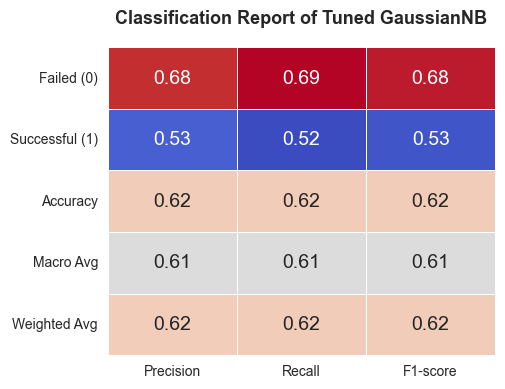

{'model_name': 'GaussianNB', 'best_score': 0.6536627747102948, 'best_params': {'GaussianNB__var_smoothing': 1e-05, 'Scaler': StandardScaler()}, 'classification_report': {'0': {'precision': 0.6815519399249061, 'recall': 0.6879927228623408, 'f1-score': 0.6847571863289993, 'support': 39576.0}, '1': {'precision': 0.5320068220579874, 'recall': 0.5245711723158564, 'f1-score': 0.5282628330573536, 'support': 26759.0}, 'accuracy': 0.6220697972412753, 'macro avg': {'precision': 0.6067793809914468, 'recall': 0.6062819475890986, 'f1-score': 0.6065100096931764, 'support': 66335.0}, 'weighted avg': {'precision': 0.6212266544948786, 'recall': 0.6220697972412753, 'f1-score': 0.6216286358021889, 'support': 66335.0}}, 'confusion_matrix': array([[27228, 12348],
       [12722, 14037]]), 'auc_score': 0.6552326663643628, 'accuracy': 0.6220697972412753, 'f1': 0.6216286358021889, 'precision': 0.6212266544948786, 'recall': 0.6220697972412753}


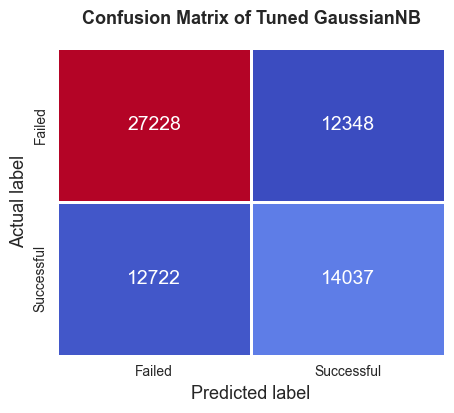

In [235]:
param_grid_gnb = [
    {
        "GaussianNB__var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6, 1e-5],
        "Scaler": [MinMaxScaler(), StandardScaler()],
    }
]

# results_gnb = perform_grid(gaussianClf, param_grid_gnb, X, y.values.ravel())

results_gnb = perform_grid(gaussianClf, param_grid_gnb, X, y, cv= cv)

print(results_gnb)

In [236]:
gausian_best = results_gnb["best_params"]
gaussian_auc = auc_list[0]
gaussian_acc = accuracy_list[0]
gaussian_f1 = f1_list[0]
gaussian_precision = precision_list[0]
gaussian_recall = recall_list[0]
print('Gaussian NB metrics: ')
print('Gaussian NB Best Params', gausian_best)
print('Gaussian NB AUC: ', gaussian_auc)
print('Gaussian NB Accuracy: ', gaussian_acc)
print('Gaussian NB F1: ', gaussian_f1)
print('Gaussian NB Precision: ', gaussian_precision)
print('Gaussian NB Recall: ', gaussian_recall)

Gaussian NB metrics: 
Gaussian NB Best Params {'GaussianNB__var_smoothing': 1e-05, 'Scaler': StandardScaler()}
Gaussian NB AUC:  0.6552326663643628
Gaussian NB Accuracy:  0.6220697972412753
Gaussian NB F1:  0.6216286358021889
Gaussian NB Precision:  0.6212266544948786
Gaussian NB Recall:  0.6220697972412753


#### Tuned Bernoulli NB


Best Grid Search result: 0.6235451750244628
Best parameters: {'Bernoulli Naive Bayes__alpha': 0.1, 'Bernoulli Naive Bayes__fit_prior': True, 'Scaler': StandardScaler()}

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.75      0.70     39576
           1       0.52      0.41      0.46     26759

    accuracy                           0.61     66335
   macro avg       0.59      0.58      0.58     66335
weighted avg       0.60      0.61      0.60     66335

Confusion Matrix: 
 [[29739  9837]
 [15903 10856]]

ROC AUC Score: 0.6264456175593583


<Figure size 800x550 with 0 Axes>

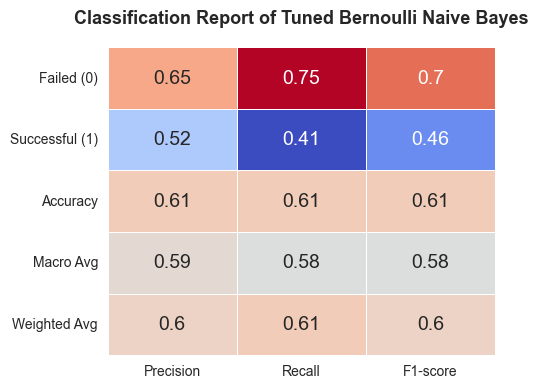

{'model_name': 'Bernoulli Naive Bayes', 'best_score': 0.6235451750244628, 'best_params': {'Bernoulli Naive Bayes__alpha': 0.1, 'Bernoulli Naive Bayes__fit_prior': True, 'Scaler': StandardScaler()}, 'classification_report': {'0': {'precision': 0.6515709215196529, 'recall': 0.7514402668283808, 'f1-score': 0.6979511370837147, 'support': 39576.0}, '1': {'precision': 0.5246218528004639, 'recall': 0.4056952800926791, 'f1-score': 0.45755711034308355, 'support': 26759.0}, 'accuracy': 0.6119695485038065, 'macro avg': {'precision': 0.5880963871600584, 'recall': 0.5785677734605299, 'f1-score': 0.5777541237133992, 'support': 66335.0}, 'weighted avg': {'precision': 0.6003606987133399, 'recall': 0.6119695485038065, 'f1-score': 0.6009781399999347, 'support': 66335.0}}, 'confusion_matrix': array([[29739,  9837],
       [15903, 10856]]), 'auc_score': 0.6264456175593583, 'accuracy': 0.6119695485038065, 'f1': 0.6009781399999347, 'precision': 0.6003606987133399, 'recall': 0.6119695485038065}


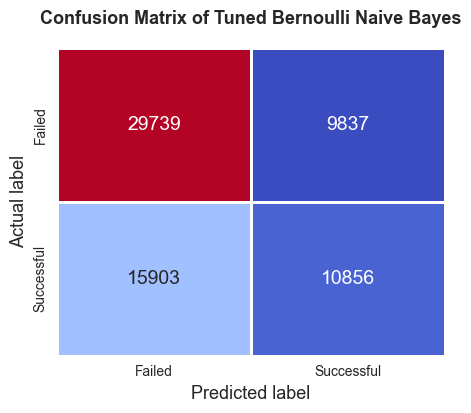

In [237]:
param_grid_ber = [
    {
        "Bernoulli Naive Bayes__alpha": [0.1, 0.5, 1.0, 1.5],
        "Bernoulli Naive Bayes__fit_prior": [True, False],
        "Scaler": [MinMaxScaler(), StandardScaler()],
    }
]

results_ber = perform_grid(berClf, param_grid_ber, X, y, cv= cv)

print(results_ber)

In [238]:
ber_best = results_ber["best_params"]
ber_auc = auc_list[1]
ber_acc = accuracy_list[1]
ber_f1 = f1_list[1]
ber_precision = precision_list[1]
ber_recall = recall_list[0]
print('Bernoulli NB metrics: ')
print('Bernoulli NB Best Params',ber_best)
print('Bernoulli NB AUC: ', ber_auc)
print('Bernoulli NB Accuracy: ', ber_acc)
print('Bernoulli NB F1: ', ber_f1)
print('Bernoulli NB Precision: ', ber_precision)
print('Bernoulli NB Recall: ', ber_recall)

Bernoulli NB metrics: 
Bernoulli NB Best Params {'Bernoulli Naive Bayes__alpha': 0.1, 'Bernoulli Naive Bayes__fit_prior': True, 'Scaler': StandardScaler()}
Bernoulli NB AUC:  0.6552326663643628
Bernoulli NB Accuracy:  0.6220697972412753
Bernoulli NB F1:  0.6216286358021889
Bernoulli NB Precision:  0.6212266544948786
Bernoulli NB Recall:  0.6220697972412753


#### Tuned KNN


Best Grid Search result: 0.6531341801661121
Best parameters: {'knn__n_neighbors': 5, 'knn__p': 1}

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.73      0.70     39576
           1       0.54      0.48      0.51     26759

    accuracy                           0.63     66335
   macro avg       0.61      0.60      0.61     66335
weighted avg       0.62      0.63      0.62     66335

Confusion Matrix: 
 [[28882 10694]
 [13963 12796]]

ROC AUC Score: 0.6527394698237583


<Figure size 800x550 with 0 Axes>

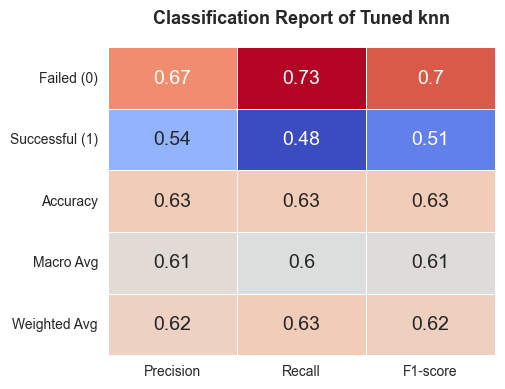

{'model_name': 'knn', 'best_score': 0.6531341801661121, 'best_params': {'knn__n_neighbors': 5, 'knn__p': 1}, 'classification_report': {'0': {'precision': 0.674104329560042, 'recall': 0.7297857287244794, 'f1-score': 0.7008408051346138, 'support': 39576.0}, '1': {'precision': 0.5447424435930183, 'recall': 0.47819425240106134, 'f1-score': 0.5093036677346813, 'support': 26759.0}, 'accuracy': 0.6282957714630286, 'macro avg': {'precision': 0.6094233865765302, 'recall': 0.6039899905627704, 'f1-score': 0.6050722364346475, 'support': 66335.0}, 'weighted avg': {'precision': 0.6219207958811155, 'recall': 0.6282957714630286, 'f1-score': 0.6235762802279311, 'support': 66335.0}}, 'confusion_matrix': array([[28882, 10694],
       [13963, 12796]]), 'auc_score': 0.6527394698237583, 'accuracy': 0.6282957714630286, 'f1': 0.6235762802279311, 'precision': 0.6219207958811155, 'recall': 0.6282957714630286}


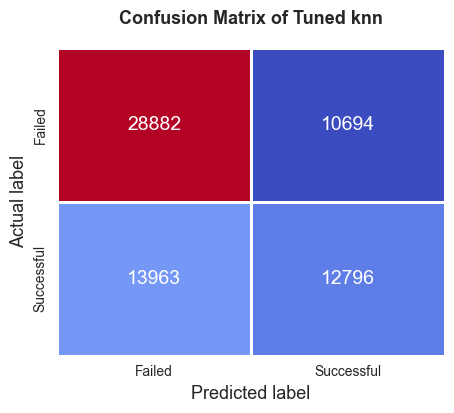

In [239]:
param_grid_knn = [{
 "knn__p": [1, 2],
 "knn__n_neighbors": [3, 4, 5]
 }]

results_knn = perform_grid(knnClf, param_grid_knn, X, y, cv= cv)

print(results_knn)

In [240]:
knn_best = results_knn["best_params"]
knn_auc = auc_list[2]
knn_acc = accuracy_list[2]
knn_f1 = f1_list[2]
knn_precision = precision_list[2]
knn_recall = recall_list[2]
print('KNN metrics: ')
print('KNN Best Params',knn_best)
print('KNN AUC: ', knn_auc)
print('KNN Accuracy: ', knn_acc)
print('KNN F1: ', knn_f1)
print('KNN Precision: ', knn_precision)
print('KNN Recall: ', knn_recall)

KNN metrics: 
KNN Best Params {'knn__n_neighbors': 5, 'knn__p': 1}
KNN AUC:  0.6264456175593583
KNN Accuracy:  0.6119695485038065
KNN F1:  0.6009781399999347
KNN Precision:  0.6003606987133399
KNN Recall:  0.6119695485038065


#### Tuned Logistic Regression


Best Grid Search result: 0.6793880538307968
Best parameters: {'Logistic Regression__C': 0.01, 'Logistic Regression__penalty': 'l2'}

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.81      0.73     39576
           1       0.58      0.38      0.46     26759

    accuracy                           0.64     66335
   macro avg       0.62      0.60      0.60     66335
weighted avg       0.63      0.64      0.62     66335

Confusion Matrix: 
 [[32187  7389]
 [16505 10254]]

ROC AUC Score: 0.6799107787020915


<Figure size 800x550 with 0 Axes>

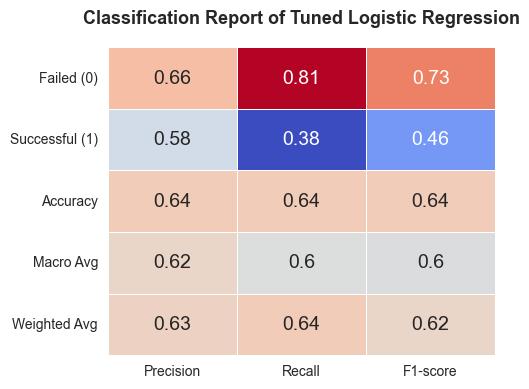

{'model_name': 'Logistic Regression', 'best_score': 0.6793880538307968, 'best_params': {'Logistic Regression__C': 0.01, 'Logistic Regression__penalty': 'l2'}, 'classification_report': {'0': {'precision': 0.6610326131602727, 'recall': 0.8132959369314736, 'f1-score': 0.7293016721801785, 'support': 39576.0}, '1': {'precision': 0.5811936745451454, 'recall': 0.38319817631451103, 'f1-score': 0.461871086887978, 'support': 26759.0}, 'accuracy': 0.6397979950252506, 'macro avg': {'precision': 0.6211131438527091, 'recall': 0.5982470566229923, 'f1-score': 0.5955863795340782, 'support': 66335.0}, 'weighted avg': {'precision': 0.6288262340481571, 'recall': 0.6397979950252506, 'f1-score': 0.6214223470601967, 'support': 66335.0}}, 'confusion_matrix': array([[32187,  7389],
       [16505, 10254]]), 'auc_score': 0.6799107787020915, 'accuracy': 0.6397979950252506, 'f1': 0.6214223470601967, 'precision': 0.6288262340481571, 'recall': 0.6397979950252506}


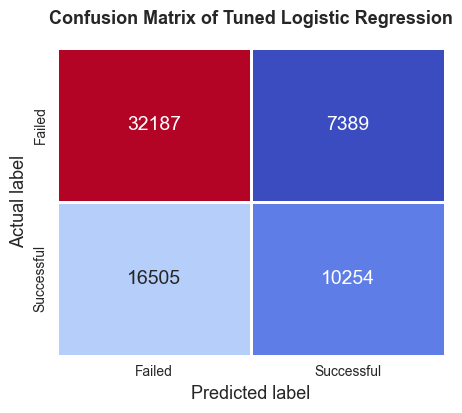

In [241]:
param_grid_log = [{
'Logistic Regression__penalty': ['l1', 'l2'],
'Logistic Regression__C': [0.001, 0.01, 0.1, 1],
 }]

results_log = perform_grid(logClf, param_grid_log, X, y, cv= cv)

print(results_log)

In [242]:
log_best = results_log["best_params"]
log_auc = auc_list[3]
log_acc = accuracy_list[3]
log_f1 = f1_list[3]
log_precision = precision_list[3]
log_recall = recall_list[3]
print('Logistic Regression metrics: ')
print('Logistic Regression Best Params',log_best)
print('Logistic Regression AUC: ', log_auc)
print('Logistic Regression Accuracy: ', log_acc)
print('Logistic Regression F1: ', log_f1)
print('Logistic Regression Precision: ', log_precision)
print('Logistic Regression Recall: ', log_recall)

Logistic Regression metrics: 
Logistic Regression Best Params {'Logistic Regression__C': 0.01, 'Logistic Regression__penalty': 'l2'}
Logistic Regression AUC:  0.6527394698237583
Logistic Regression Accuracy:  0.6282957714630286
Logistic Regression F1:  0.6235762802279311
Logistic Regression Precision:  0.6219207958811155
Logistic Regression Recall:  0.6282957714630286


#### Tuned Random Forest


Best Grid Search result: 0.704262418857831
Best parameters: {'rf__max_depth': 5, 'rf__min_samples_leaf': 4}

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.87      0.75     39576
           1       0.64      0.35      0.45     26759

    accuracy                           0.66     66335
   macro avg       0.65      0.61      0.60     66335
weighted avg       0.65      0.66      0.63     66335

Confusion Matrix: 
 [[34333  5243]
 [17382  9377]]

ROC AUC Score: 0.7067116095396886


<Figure size 800x550 with 0 Axes>

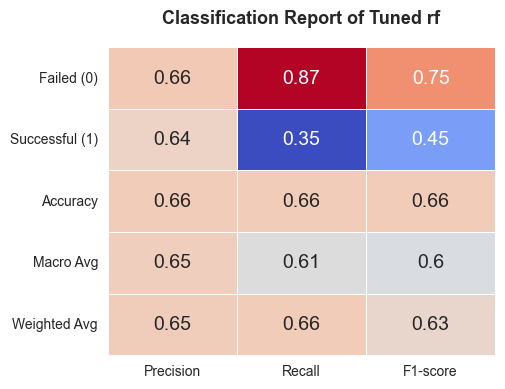

{'model_name': 'rf', 'best_score': 0.704262418857831, 'best_params': {'rf__max_depth': 5, 'rf__min_samples_leaf': 4}, 'classification_report': {'0': {'precision': 0.6638886203229237, 'recall': 0.8675207196280574, 'f1-score': 0.7521661500038339, 'support': 39576.0}, '1': {'precision': 0.6413816689466484, 'recall': 0.3504241563586083, 'f1-score': 0.4532250658546606, 'support': 26759.0}, 'accuracy': 0.6589281676339791, 'macro avg': {'precision': 0.652635144634786, 'recall': 0.6089724379933329, 'f1-score': 0.6026956079292473, 'support': 66335.0}, 'weighted avg': {'precision': 0.6548094990162568, 'recall': 0.6589281676339791, 'f1-score': 0.6315757456811125, 'support': 66335.0}}, 'confusion_matrix': array([[34333,  5243],
       [17382,  9377]]), 'auc_score': 0.7067116095396886, 'accuracy': 0.6589281676339791, 'f1': 0.6315757456811125, 'precision': 0.6548094990162568, 'recall': 0.6589281676339791}


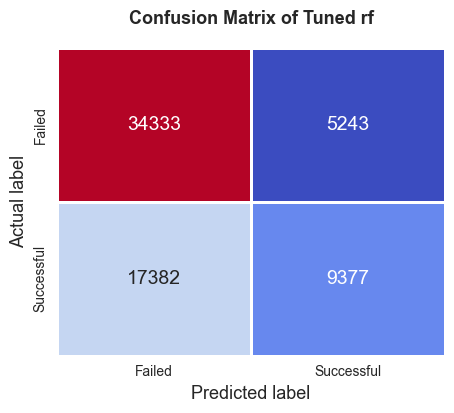

In [243]:
param_grid_rf = [{"rf__max_depth": [3, 4, 5], "rf__min_samples_leaf": [4, 5]}]

results_rf = perform_grid(rfClf, param_grid_rf, X, y, cv= cv)

print(results_rf)

In [244]:
rf_best = results_rf["best_params"]
rf_auc = auc_list[4]
rf_acc = accuracy_list[4]
rf_f1 = f1_list[4]
rf_precision = precision_list[4]
rf_recall = recall_list[4]
print('RF metrics: ')
print('RF Best Params',rf_best)
print('RF AUC: ', rf_auc)
print('RF Accuracy: ', rf_acc)
print('RF F1: ', rf_f1)
print('RF Precision: ', rf_precision)
print('RF Recall: ', rf_recall)

RF metrics: 
RF Best Params {'rf__max_depth': 5, 'rf__min_samples_leaf': 4}
RF AUC:  0.6799107787020915
RF Accuracy:  0.6397979950252506
RF F1:  0.6214223470601967
RF Precision:  0.6288262340481571
RF Recall:  0.6397979950252506


#### Compared Tuned Models and Baseline Model


In [245]:
compare_all = pd.DataFrame({"Model": ['Dummy Classifier','Tuned Gaussian NB','Tuned Bernoulli NB','Tuned KNN','Tuned LR','Tuned RF'],
                            
                            "Accuracy": [dummyAcc, gaussian_acc, ber_acc, knn_acc, log_acc, rf_acc],
                        
                        "F1_Score": [dummyF1, gaussian_f1, ber_f1, knn_f1, log_f1, rf_f1],
                                                 
                        "Recall": [dummyRec, gaussian_recall, ber_recall, knn_recall, log_recall, rf_recall],
                        
                        "Precision": [dummyPre, gaussian_precision, ber_precision, knn_precision, log_precision, rf_precision],

                        "ROC_AUC": [dummyAUC, gaussian_auc, ber_auc, knn_auc, log_auc, rf_auc]
                        })
compare_all

,Model,Accuracy,F1_Score,Recall,Precision,ROC_AUC
0,Dummy Classifier,0.596608,0.445872,0.596608,0.355941,0.500000
1,Tuned Gaussian NB,0.622070,0.621629,0.622070,0.621227,0.655233
2,Tuned Bernoulli NB,0.622070,0.621629,0.622070,0.621227,0.655233
3,Tuned KNN,0.611970,0.600978,0.611970,0.600361,0.626446
4,Tuned LR,0.628296,0.623576,0.628296,0.621921,0.652739
5,Tuned RF,0.639798,0.621422,0.639798,0.628826,0.679911


In [251]:
compare_f1 = compare_all.sort_values(by= "F1_Score", ascending=False)
                                     
fig = px.bar(compare_f1, x = "F1_Score", y = "Model", 
             color = "Model", 
             color_discrete_sequence =["#b40426","#e46e56","#3b4cc0","#86a9fc","#f7af91", "#516ddb" ],
             text_auto=True, width=600, height=300).update_traces(dict(marker_line_width=0.5, marker_line_color="black"), 
                                                                  textfont_size=14).update_layout(showlegend=False,
                                                                                                  template="simple_white",
                                                 title=dict(text="F1-SCORE OF PROPOSED MODELS", font=dict(size=18),
                                                             yref="paper", x= 0.5), xaxis_title=dict(font=dict(size=16)),
                                                             yaxis_title=dict(font=dict(size=16))).update_xaxes(tickfont=dict(size=14)).update_yaxes(tickfont=dict(size=14))
fig.show()

In [252]:
compare_auc = compare_all.sort_values(by= "ROC_AUC", ascending=False)
                                     
fig = px.bar(compare_auc, x = "ROC_AUC", y = "Model", 
             color = "Model", 
            color_discrete_sequence =["#b40426","#e46e56","#3b4cc0","#86a9fc","#f7af91", "#516ddb" ],
             text_auto=True, width=600, height=300).update_traces(dict(marker_line_width=0.5, marker_line_color="black"), 
                                                                  textfont_size=14).update_layout(showlegend=False,
                                                                                                  template="simple_white",
                                                 title=dict(text="ROC-AUC OF PROPOSED MODELS", font=dict(size=18),
                                                             yref="paper", x= 0.5), xaxis_title=dict(font=dict(size=16)),
                                                             yaxis_title=dict(font=dict(size=16))).update_xaxes(tickfont=dict(size=14)).update_yaxes(tickfont=dict(size=14))
fig.show()